exploration of various detection algos to find the blue grid.   didn't work

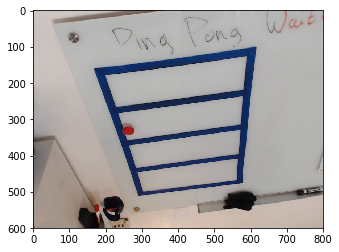

In [1]:
import cv2
cv2.__version__

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread("frame12.png")
image = img
# test plotting
def imshow(img):  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
imshow(img)

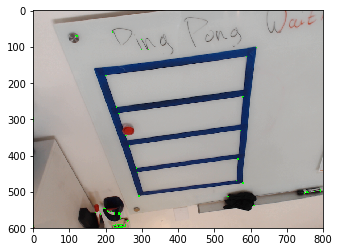

In [15]:
# harris corner detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
corners = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
corners = cv2.dilate(corners, None)
dst = img.copy()
# Threshold for an optimal value, it may vary depending on the image.
dst[corners>0.05*corners.max()]=[0,255,0]
imshow(dst)

(4218, 1, 4)


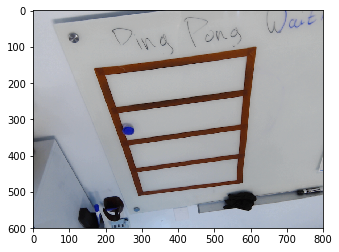

In [33]:
# hough lines
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,20,250,apertureSize = 3)
lines = cv2.HoughLinesP(gray.copy(), 1, np.pi/180, 200 , 100, 10)
print(lines.shape)
plt.imshow(img)

(6844, 1, 4)


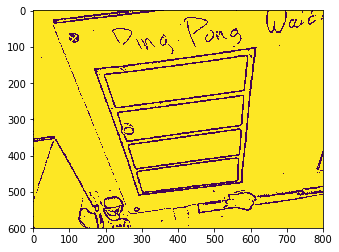

In [43]:
# thresholding by itself
img = image
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img,5)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,11,2)
plt.imshow(th3)

In [45]:
# threshold HSV image
# valid blue values measured of an image (use Digital Color Meter)
valid = np.array([15,37,82, 18,50,104, 11,33,74, 21,31,63, 16,40,91, 15,42,92, 11,45,102, 16,32,73, 
                  16,26,42, 13,30,59, 48,71,112, 17,54,110, 61,75,116, 62,74,111, 
                 14,53,118, 13,54,119, 51,54,87, 54,56,87], dtype=np.uint8)
valid = valid.reshape([-1, 2, 3])
cv2.cvtColor(valid, cv2.COLOR_RGB2HSV)


array([[[110, 208,  82],
        [109, 211, 104]],

       [[109, 217,  74],
        [113, 170,  63]],

       [[110, 210,  91],
        [109, 213,  92]],

       [[109, 228, 102],
        [112, 199,  73]],

       [[108, 158,  42],
        [109, 199,  59]],

       [[109, 146, 112],
        [108, 216, 110]],

       [[112, 121, 116],
        [113, 113, 111]],

       [[109, 225, 118],
        [108, 227, 119]],

       [[117, 106,  87],
        [118,  97,  87]]], dtype=uint8)

In [46]:
def tightbluemask(image, clean=True):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    threshold  = np.array([[103,95,30],[120,240,125]])
    mask = cv2.inRange(hsv, threshold[0,:], threshold[1,:])

    if clean:
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    return mask


# plt.imshow(tightbluemask(image))

In [4]:
# try everywhere
# %matplotlib osx
#    RESTART KERNEL TO USE EXTERNAL IMAGE VIEWER
import cv2
import numpy as np
import matplotlib.pyplot as plt
cv2.startWindowThread()
cv2.namedWindow('showboxes')
img = cv2.imread("frame1.png")

# test plotting
def imshow(img):  
    cv2.imshow('showboxes', cv2.cvtColor(img, cv2.COLOR_GRAY2BGR))
    cv2.waitKey()
    
import glob, sys
for fn in glob.glob("stills-thu/frame*png"): 
    print(fn)
    try:
        imshow(tightbluemask(cv2.imread(fn)))
        
    except Exception as e:
        print("EXCEPTION:", e)

stills-thu/frame10.png
stills-thu/frame100.png
stills-thu/frame1000.png
stills-thu/frame1001.png
stills-thu/frame1002.png
stills-thu/frame1003.png
stills-thu/frame1004.png
stills-thu/frame1005.png
stills-thu/frame1006.png
stills-thu/frame1007.png
stills-thu/frame1008.png
stills-thu/frame1009.png
stills-thu/frame101.png
stills-thu/frame1010.png
stills-thu/frame1011.png
stills-thu/frame1012.png
stills-thu/frame1013.png
stills-thu/frame1014.png
stills-thu/frame1015.png
stills-thu/frame1016.png
stills-thu/frame1017.png
stills-thu/frame1018.png
stills-thu/frame1019.png
stills-thu/frame102.png
stills-thu/frame1020.png
stills-thu/frame1021.png
stills-thu/frame1022.png
stills-thu/frame1023.png
stills-thu/frame1024.png
stills-thu/frame1025.png
stills-thu/frame1026.png
stills-thu/frame1027.png
stills-thu/frame1028.png
stills-thu/frame1029.png
stills-thu/frame103.png
stills-thu/frame1030.png
stills-thu/frame1031.png
stills-thu/frame1032.png
stills-thu/frame1033.png
stills-thu/frame1034.png
stills

KeyboardInterrupt: 

In [51]:
import glob, sys, time, os
os.system("rm stills-thu/*.x.png")
for fn in glob.glob("stills-thu/frame*png"): 
    newname = fn.replace(".png", ".x.png")
    print(newname)
    img = cv2.imread(fn)
    conv = tightbluemask(img)
    #conv3 = cv2.cvtColor(conv, cv2.COLOR_GRAY2RGB) # 182,177,240
    #supr = cv2.bitwise_and(img,img, mask=cv2.bitwise_not(conv))
    supr = img.copy()
    supr[conv>0,:] = (182,177,240) 
    print(supr.shape)
    both = np.concatenate([supr,conv3], axis=1)
    cv2.imwrite(newname, both)
    

stills-thu/frame10.x.png
(600, 800, 3)
stills-thu/frame100.x.png
(600, 800, 3)
stills-thu/frame101.x.png
(600, 800, 3)
stills-thu/frame102.x.png
(600, 800, 3)
stills-thu/frame103.x.png
(600, 800, 3)
stills-thu/frame104.x.png
(600, 800, 3)
stills-thu/frame105.x.png
(600, 800, 3)
stills-thu/frame106.x.png
(600, 800, 3)
stills-thu/frame107.x.png
(600, 800, 3)
stills-thu/frame108.x.png
(600, 800, 3)
stills-thu/frame109.x.png
(600, 800, 3)
stills-thu/frame11.x.png
(600, 800, 3)
stills-thu/frame110.x.png
(600, 800, 3)
stills-thu/frame111.x.png
(600, 800, 3)
stills-thu/frame112.x.png
(600, 800, 3)
stills-thu/frame113.x.png
(600, 800, 3)
stills-thu/frame114.x.png
(600, 800, 3)
stills-thu/frame115.x.png
(600, 800, 3)
stills-thu/frame116.x.png
(600, 800, 3)
stills-thu/frame117.x.png
(600, 800, 3)
stills-thu/frame118.x.png
(600, 800, 3)
stills-thu/frame119.x.png
(600, 800, 3)
stills-thu/frame12.x.png
(600, 800, 3)
stills-thu/frame120.x.png
(600, 800, 3)
stills-thu/frame121.x.png
(600, 800, 3)
sti

stills-thu/frame72.png


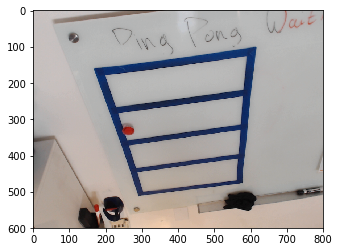

In [42]:
bad = "stills-thu/frame1057.png stills-thu/frame107.png stills-thu/frame120.png stills-thu/frame17.png stills-thu/frame72.png".split()
fn = bad[4]
print(fn)
img = cv2.imread(fn)
imshow(img)

    

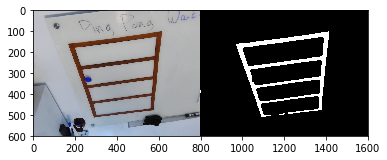

In [44]:
imshow(img)
conv = tightbluemask(img)
conv = cv2.cvtColor(conv, cv2.COLOR_GRAY2RGB)
#conv = cv2.bitwise_and(img,img, mask=cv2.bitwise_not(conv))
conv = np.concatenate([img,conv], axis=1)
plt.imshow(conv)

In [25]:
conv = conv[:,:,np.newaxis]
layer0 = np.zeros_like(conv)
conv = np.append(conv, layer0, axis=2)
conv = np.append(conv, layer0, axis=2)
conv.shape

(600, 800, 4)